In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = 'drive/MyDrive/MortalityDATA.xlsx'

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_excel(dataset)
df.shape

(91713, 85)

### Feature Extration


In [6]:
DM_df = df[df['diabetes_mellitus'] == 1]  #Selecting Only Diabetes
DM_df = DM_df.drop(['diabetes_mellitus'], axis=1)

In [7]:
DM_df = DM_df.drop(columns=[
    'encounter_id', 'icu_id', 'patient_id','hospital_id', #id
    'weight','height', #to BMI
    'Unnamed: 83', #null
    'ethnicity', #Sri lanka?
    'aids', 'lymphoma', 'cirrhosis','leukemia','hepatic_failure','immunosuppression','solid_tumor_with_metastasis' #less contributing diseases
    ])

In [8]:
DM_df = DM_df.drop(columns=[ #noninvasive
                            'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
                            'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min',
                             'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
                             'h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min',
                             'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
                             'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min'
    ])

In [9]:
DM_df.shape

(20492, 57)

In [10]:
DM_df.isnull().sum()

,0
age,493
bmi,753
elective_surgery,0
gender,1
icu_admit_source,24
icu_stay_type,0
icu_type,0
pre_icu_los_days,0
apache_2_diagnosis,164
apache_3j_diagnosis,47


#### Data Filling

In [39]:
DM_df['age'] = DM_df['age'].fillna(DM_df['age'].mean()) #should I take mean for age?

In [40]:
DM_df['bmi'] = DM_df['bmi'].fillna(DM_df['bmi'].mean())

In [41]:
DM_df.isnull().sum()

,0
age,0
bmi,0
elective_surgery,0
gender,1
icu_admit_source,24
icu_stay_type,0
icu_type,0
pre_icu_los_days,0
apache_2_diagnosis,164
apache_3j_diagnosis,47


In [42]:
# DM_df = DM_df.dropna() # handle in a different
# DM_df.shape

In [11]:
X = DM_df.copy()
y = X['hospital_death']  #target variable
X = X.drop(['hospital_death'], axis=1)
X.shape

(20492, 56)

In [44]:
DM_df.columns

Index(['age', 'bmi', 'elective_surgery', 'gender', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_heartrate_max',
       'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max',
       'h1_diasbp_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max',
       'h1_mbp_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max',
       'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_glucose_max',
       'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min',
    

In [12]:
from sklearn.preprocessing import LabelEncoder

In [46]:
categorical_columns = ['icu_type','gender', 'icu_stay_type','icu_admit_source','apache_3j_bodysystem','apache_2_bodysystem']  # Replace with your categorical columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [47]:
X.head()

,age,bmi,elective_surgery,gender,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,...,h1_sysbp_max,h1_sysbp_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.73000,0,1,1,0,2,0.541667,113.0,502.01,...,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,9,0
1,77.0,27.42000,0,0,1,0,5,0.927778,108.0,203.01,...,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,8,6
5,67.0,27.56000,0,1,0,0,5,0.000694,301.0,403.01,...,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,7,4
6,59.0,57.45000,0,0,0,0,5,0.000694,108.0,203.01,...,191.0,163.0,197.0,129.0,5.0,4.2,0.10,0.05,8,6
15,78.0,31.83336,0,0,0,0,4,0.000694,113.0,502.01,...,119.0,89.0,109.0,90.0,5.5,5.5,0.02,0.01,9,0


In [13]:
  from sklearn.ensemble import RandomForestClassifier

  # Initialize and train a RandomForestClassifier
  rf_model = RandomForestClassifier(n_estimators=150, random_state=42)  # You can adjust n_estimators
  rf_model.fit(X, y)

  # Get feature importances
  feature_importances = rf_model.feature_importances_*100

  # Create a DataFrame to display feature importances
  feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
  feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

  # Print or visualize the feature importances
  print(feature_importance_df)

  # Visualization (optional)
  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
  plt.title('Feature Importance')
  plt.show()

ValueError: could not convert string to float: 'M'

In [ ]:
# Features with importance below 1
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < 1]['Feature'].tolist()

# Drop the features
Xdroped = X.drop(columns=features_to_drop)
# Xdroped.columns
features_to_drop

In [50]:
Xdroped.shape

(20492, 42)

In [51]:
# Initialize and train a new RandomForestClassifier on Xdroped
rf_model_dropped = RandomForestClassifier(n_estimators=150, random_state=11)
rf_model_dropped.fit(Xdroped, y)

# Get feature importances for Xdroped
feature_importances_dropped = rf_model_dropped.feature_importances_ * 100

# Create a DataFrame to display feature importances for Xdroped
feature_importance_df_dropped = pd.DataFrame({'Feature': Xdroped.columns, 'Importance': feature_importances_dropped})
feature_importance_df_dropped = feature_importance_df_dropped.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances for Xdroped
print(feature_importance_df_dropped)

                          Feature  Importance
41       apache_4a_icu_death_prob    7.571920
40  apache_4a_hospital_death_prob    7.070046
19                    d1_spo2_min    2.942916
23                    d1_temp_min    2.927657
4             apache_3j_diagnosis    2.873768
14               d1_heartrate_min    2.823142
21                   d1_sysbp_min    2.755587
2                pre_icu_los_days    2.706892
37                 d1_glucose_min    2.685975
22                    d1_temp_max    2.639483
10                    temp_apache    2.563820
39               d1_potassium_min    2.521524
36                 d1_glucose_max    2.488244
16                     d1_mbp_min    2.417614
1                             bmi    2.334996
38               d1_potassium_max    2.198552
12                  d1_diasbp_min    2.180461
13               d1_heartrate_max    2.160878
20                   d1_sysbp_max    2.155530
35                   h1_sysbp_min    2.116012
34                   h1_sysbp_max 

In [52]:
Xdroped_2 = Xdroped.drop(columns=['apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob'])
Xdroped_2.shape

(20492, 40)

In [53]:
# Initialize and train a new RandomForestClassifier on Xdroped
rf_model_dropped = RandomForestClassifier(n_estimators=150, random_state=1)
rf_model_dropped.fit(Xdroped_2, y)

# Get feature importances for Xdroped
feature_importances_dropped = rf_model_dropped.feature_importances_ * 100

# Create a DataFrame to display feature importances for Xdroped
feature_importance_df_dropped = pd.DataFrame({'Feature': Xdroped_2.columns, 'Importance': feature_importances_dropped})
feature_importance_df_dropped = feature_importance_df_dropped.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances for Xdroped
print(feature_importance_df_dropped)

                Feature  Importance
4   apache_3j_diagnosis    4.014675
23          d1_temp_min    3.602488
19          d1_spo2_min    3.470431
2      pre_icu_los_days    3.273863
14     d1_heartrate_min    3.231725
5       gcs_eyes_apache    3.215424
21         d1_sysbp_min    3.206659
22          d1_temp_max    3.149999
10          temp_apache    3.013448
37       d1_glucose_min    2.994581
16           d1_mbp_min    2.796983
39     d1_potassium_min    2.755009
6      gcs_motor_apache    2.613568
13     d1_heartrate_max    2.610338
36       d1_glucose_max    2.592485
1                   bmi    2.528174
0                   age    2.486859
38     d1_potassium_max    2.484927
7     heart_rate_apache    2.368442
35         h1_sysbp_min    2.347097
12        d1_diasbp_min    2.315929
20         d1_sysbp_max    2.285679
3    apache_2_diagnosis    2.274836
8            map_apache    2.244039
29           h1_mbp_min    2.229105
17      d1_resprate_max    2.174318
31      h1_resprate_min    2

In [54]:
  # apache score drop
  Xdroped_3 = Xdroped_2.drop(columns=['gcs_motor_apache','resprate_apache','heart_rate_apache','temp_apache','gcs_eyes_apache',
                                      'map_apache','heart_rate_apache','apache_3j_diagnosis','apache_2_diagnosis','resprate_apache'
                                      ])
  Xdroped_3.shape

(20492, 32)

In [55]:
# Initialize and train a new RandomForestClassifier on Xdroped_3
rf_model_dropped = RandomForestClassifier(n_estimators=200, random_state=2)
rf_model_dropped.fit(Xdroped_3, y)

# Get feature importances for Xdroped_3
feature_importances_dropped = rf_model_dropped.feature_importances_ * 100

# Create a DataFrame to display feature importances for Xdroped_3
feature_importance_df_dropped = pd.DataFrame({'Feature': Xdroped_3.columns, 'Importance': feature_importances_dropped})
feature_importance_df_dropped = feature_importance_df_dropped.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances for Xdroped_3
feature_importance_df_dropped

,Feature,Importance
15,d1_temp_min,5.836860
14,d1_temp_max,4.676904
11,d1_spo2_min,4.337956
6,d1_heartrate_min,4.322560
13,d1_sysbp_min,4.073642
2,pre_icu_los_days,3.703380
29,d1_glucose_min,3.567986
5,d1_heartrate_max,3.467964
8,d1_mbp_min,3.414142
28,d1_glucose_max,3.328383


In [56]:
Xdroped_3.isnull().sum()

,0
age,0
bmi,0
pre_icu_los_days,0
d1_diasbp_max,24
d1_diasbp_min,24
d1_heartrate_max,21
d1_heartrate_min,21
d1_mbp_max,27
d1_mbp_min,27
d1_resprate_max,85


In [59]:
Xdroped_3 = Xdroped_3.dropna() # handle in a different
print(DM_df.shape)
print(Xdroped_3.shape)

(20492, 57)
(17083, 32)


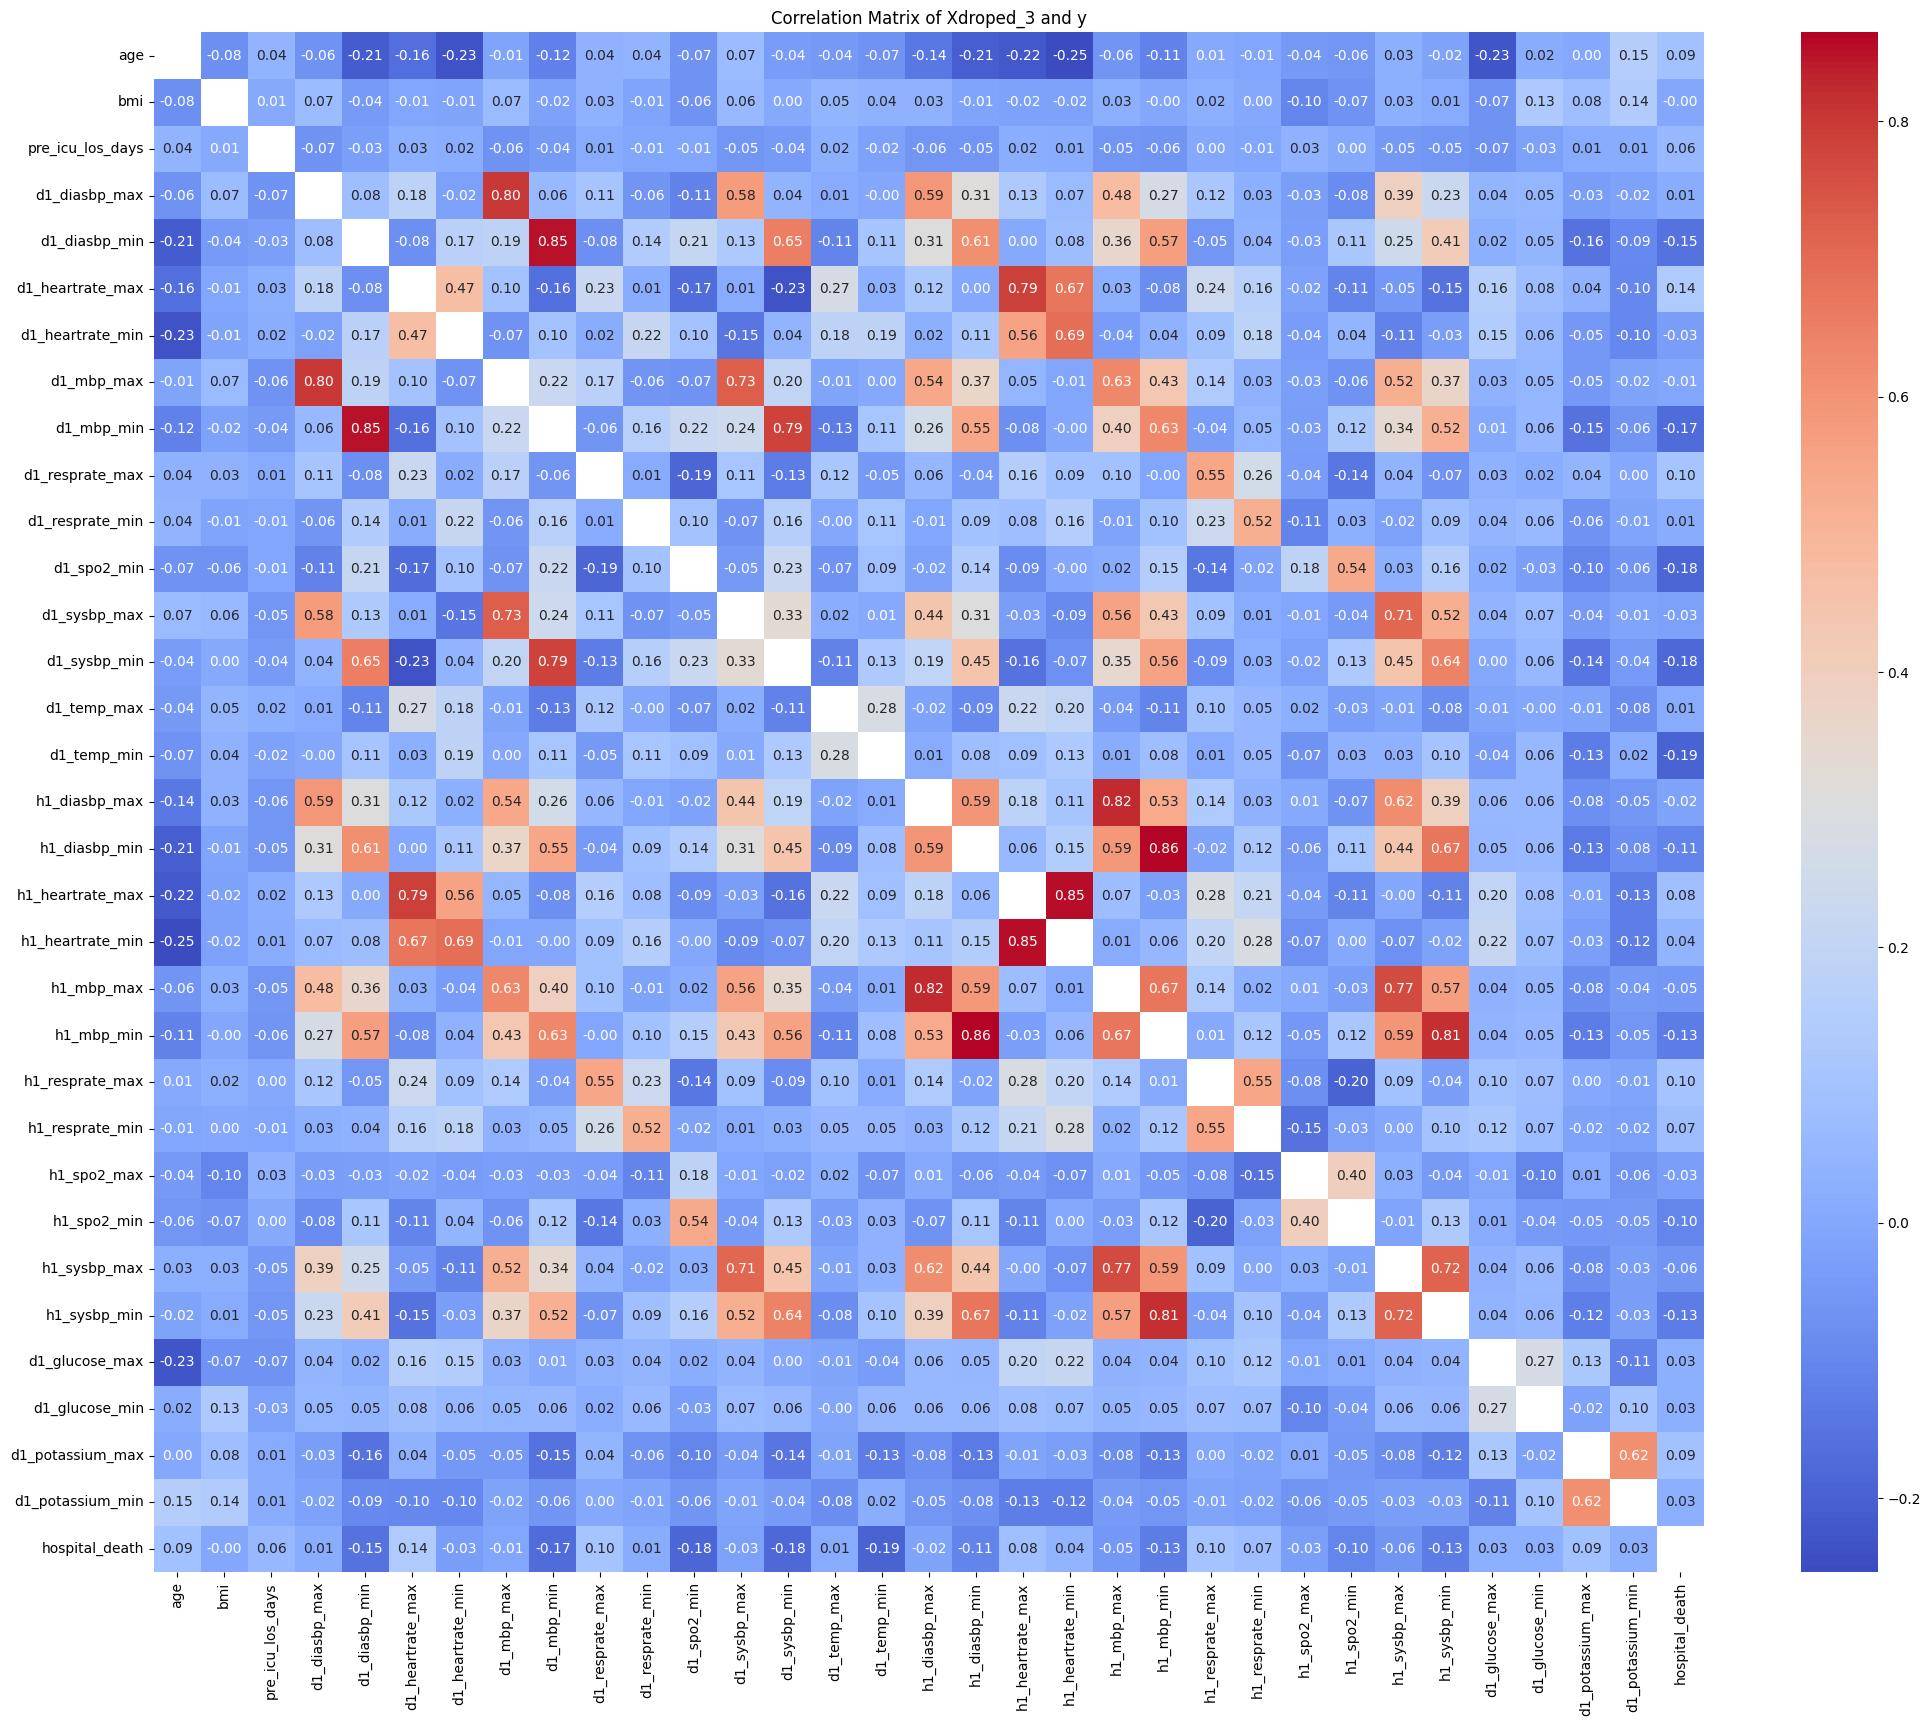

In [29]:
# Merge Xdroped_3 and y (assuming y is a Series)
merged_df = pd.concat([Xdroped_3, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

filtered_corr = correlation_matrix[(correlation_matrix !=1.00)]

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Xdroped_3 and y')
plt.show()

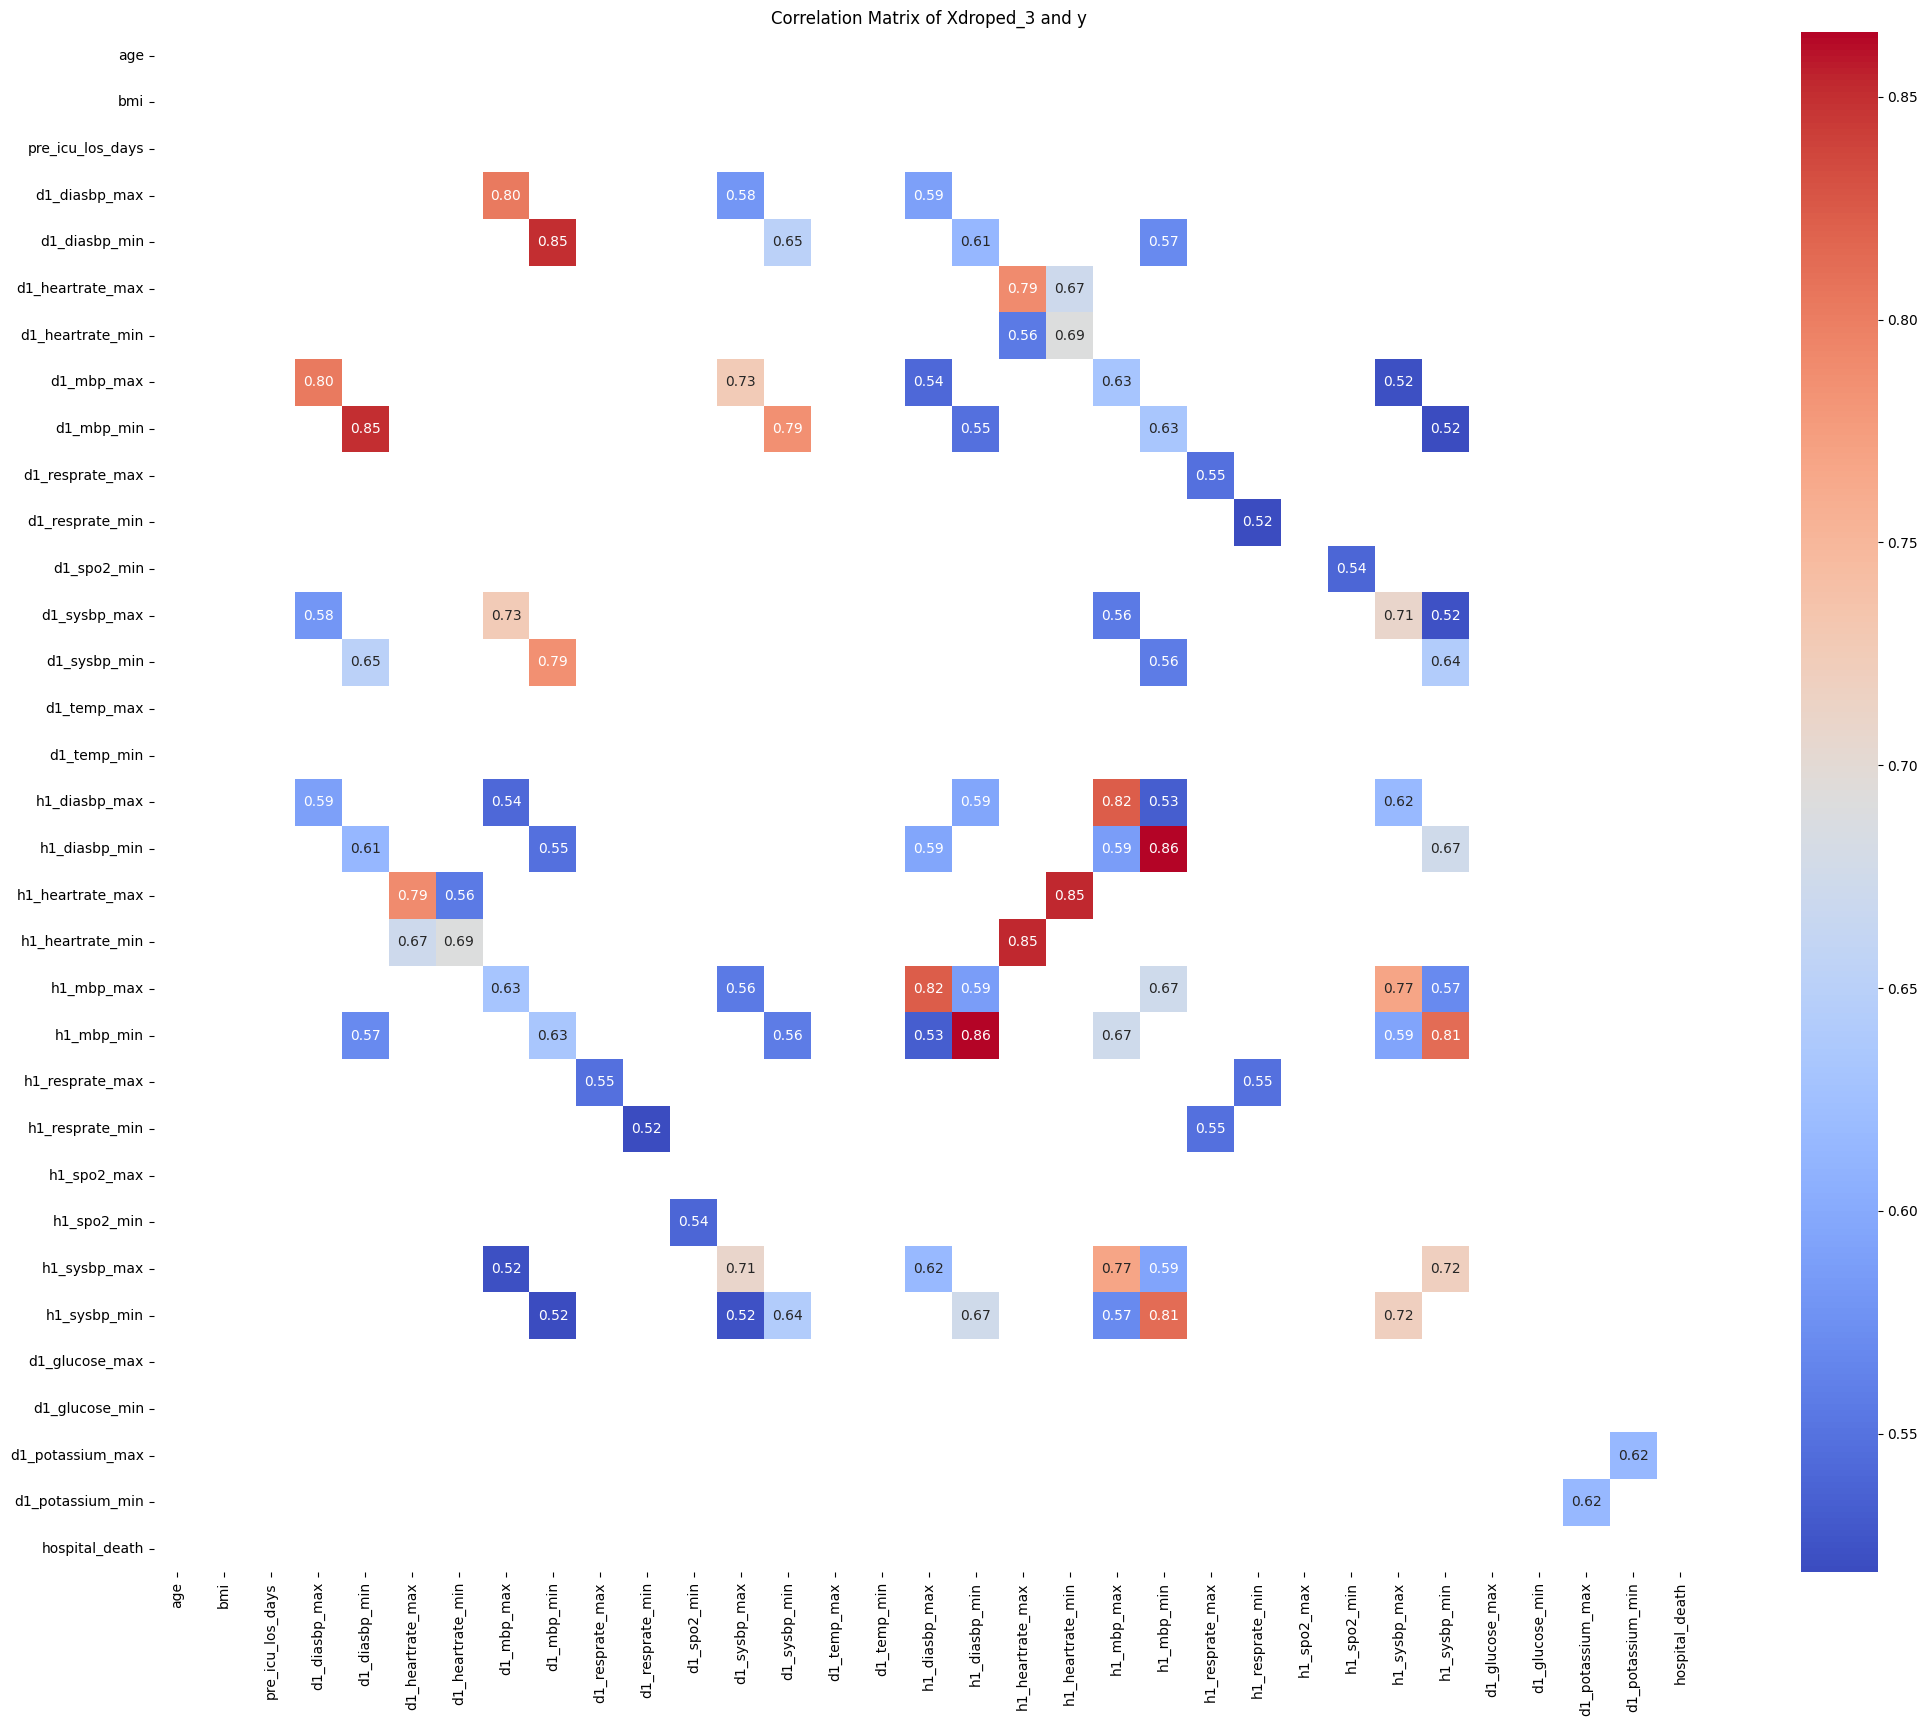

In [61]:
# Merge Xdroped_3 and y (assuming y is a Series)
merged_df = pd.concat([Xdroped_3, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

filtered_corr = correlation_matrix[((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (correlation_matrix !=1.00)]

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Xdroped_3 and y')
plt.show()

In [62]:
merged_df = pd.concat([Xdroped_3, y], axis=1)
merged_df = merged_df.dropna()
merged_df.shape

(17083, 33)

In [63]:
from sklearn.model_selection import train_test_split

Xdroped_3 = merged_df.drop('hospital_death', axis=1)
y = merged_df['hospital_death']

In [ ]:
from google.colab import files
merged_df.to_csv('merged_df.csv')
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a RandomForestClassifier on the resampled data
rf_model_smote = RandomForestClassifier(n_estimators=200, random_state=2)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=2)

In [21]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = rf_model_smote.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))

NameError: name 'rf_model_smote' is not defined

In [67]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Generate and print the classification report for XGBoost
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3162
           1       0.34      0.15      0.20       255

    accuracy                           0.91      3417
   macro avg       0.64      0.56      0.58      3417
weighted avg       0.89      0.91      0.90      3417



In [ ]:
# Data standardization

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(Xdroped_3)

# Convert the scaled data back to a DataFrame (optional)
Xdroped_3_normalized = pd.DataFrame(X_scaled, columns=Xdroped_3.columns)

In [ ]:
Xdroped_3_normalized.head()

,age,bmi,pre_icu_los_days,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,...,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min
0,0.712329,0.148859,0.011563,0.184874,0.311688,0.512605,0.496552,0.233871,0.266667,0.256410,...,0.500000,0.326531,0.141732,0.74,0.378378,0.439716,0.176580,0.298039,0.285714,0.294118
1,0.835616,0.237400,0.017489,0.411765,0.233766,0.504202,0.496552,0.483871,0.177778,0.230769,...,0.235849,0.428571,0.220472,0.70,0.135135,0.127660,0.133829,0.372549,0.333333,0.411765
2,0.698630,0.240043,0.003261,0.453782,0.623377,0.462185,0.572414,0.540323,0.644444,0.230769,...,0.745283,0.040816,0.094488,0.97,0.459459,0.638298,0.154275,0.360784,0.261905,0.382353
3,0.589041,0.804324,0.003261,0.252101,0.714286,0.453782,0.482759,0.459677,0.833333,0.307692,...,0.801887,0.163265,0.141732,1.00,0.783784,0.780142,0.230483,0.376471,0.523810,0.529412
4,0.849315,0.320718,0.003261,0.201681,0.389610,0.201681,0.468966,0.467742,0.466667,0.102564,...,0.424528,0.204082,0.133858,0.95,0.297297,0.255319,0.066914,0.223529,0.642857,0.911765


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xdroped_3_normalized, y, test_size=0.3, random_state=11)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions (if needed)
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

# Generate classification report
print(classification_report(y_test, y_pred_classes))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6642 - loss: 0.6124 - val_accuracy: 0.4801 - val_loss: 0.8665
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7183 - loss: 0.5610 - val_accuracy: 0.5744 - val_loss: 0.7657
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7325 - loss: 0.5361 - val_accuracy: 0.6136 - val_loss: 0.6957
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7355 - loss: 0.5299 - val_accuracy: 0.5438 - val_loss: 0.7564
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7376 - loss: 0.5198 - val_accuracy: 0.5751 - val_loss: 0.6887
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7478 - loss: 0.5144 - val_accuracy: 0.5061 - val_loss: 0.8302
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7511 - loss: 0.4979 - val_accuracy: 0.5443 - val_loss: 0.7350
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7563 - loss: 0.4933 - val_accuracy: 0.5700 - val_

In [ ]:
mod = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

print(mod.history.keys())

for key in mod.history:
  print(f"{key}: {mod.history[key]}")

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8100 - loss: 0.4039 - val_accuracy: 0.7382 - val_loss: 0.5324
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8064 - loss: 0.4030 - val_accuracy: 0.7519 - val_loss: 0.4861
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8145 - loss: 0.3960 - val_accuracy: 0.7794 - val_loss: 0.4669
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8160 - loss: 0.3954 - val_accuracy: 0.8296 - val_loss: 0.4300
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.3903 - val_accuracy: 0.7063 - val_loss: 0.5709
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8107 - loss: 0.3981 - val_accuracy: 0.7499 - val_loss: 0.5069
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.3924 - val_accuracy: 0.7379 - val_loss: 0.5467
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8194 - loss: 0.3896 - val_accuracy: 0.

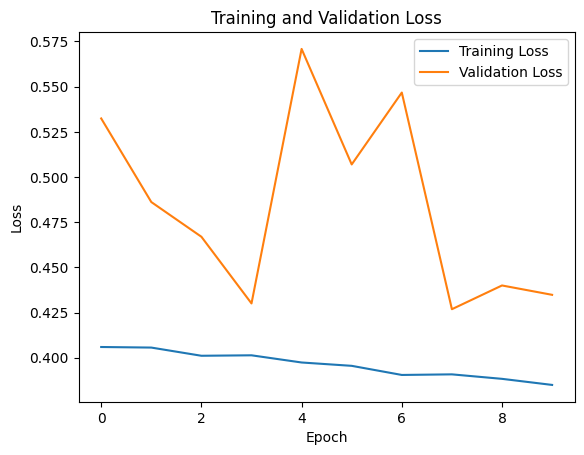

In [ ]:
# Assuming 'model' is your trained Keras model and 'history' contains the training history
plt.plot(model.history.history['loss'], label='Training Loss') # Access history using model.history.history
plt.plot(model.history.history['val_loss'], label='Validation Loss') # Access history using model.history.history
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
random_data_point = np.random.rand(1, Xdroped_3_normalized.shape[1])

y_pred = model.predict(random_data_point)

# Print the prediction
print("Predicted Probability:", y_pred)
print("Predicted Class:", (y_pred > 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Probability: [[0.92065567]]
Predicted Class: [[1]]


In [ ]:
random_index = np.random.randint(0, Xdroped_3_normalized.shape[0])
random_data_point = Xdroped_3_normalized.iloc[[random_index]]
print("Random data point index:", random_index)
y_pred = model.predict(random_data_point)
# Print the prediction
print("Predicted Probability:", y_pred)
print("Predicted Class:", (y_pred > 0.5).astype(int))

Random data point index: 743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Probability: [[0.37585938]]
Predicted Class: [[0]]


#### Benchmarking

In [ ]:
benchmark_df = Xdroped.drop(columns=['gcs_motor_apache','resprate_apache','heart_rate_apache','temp_apache','gcs_eyes_apache','map_apache','heart_rate_apache','apache_3j_diagnosis','apache_2_diagnosis','resprate_apache'])
benchmark_df.head()

,age,bmi,pre_icu_los_days,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,...,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73000,0.541667,68.0,37.0,119.0,72.0,89.0,46.0,34.0,...,18.0,74.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05
1,77.0,27.42000,0.927778,95.0,31.0,118.0,72.0,120.0,38.0,32.0,...,28.0,70.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29
5,67.0,27.56000,0.000694,100.0,61.0,113.0,83.0,127.0,80.0,32.0,...,12.0,97.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02
6,59.0,57.45000,0.000694,76.0,68.0,112.0,70.0,117.0,97.0,38.0,...,18.0,100.0,191.0,163.0,197.0,129.0,5.0,4.2,0.10,0.05
15,78.0,31.83336,0.000694,70.0,43.0,82.0,68.0,118.0,64.0,22.0,...,17.0,95.0,119.0,89.0,109.0,90.0,5.5,5.5,0.02,0.01


In [ ]:
benchmark1 = benchmark_df[['apache_4a_hospital_death_prob']]
benchmark2 = benchmark_df[['apache_4a_icu_death_prob']]
benchmark_df.drop(columns=['apache_4a_hospital_death_prob','apache_4a_icu_death_prob'], inplace=True)
benchmark_df.head()

,age,bmi,pre_icu_los_days,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,...,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min
0,68.0,22.73000,0.541667,68.0,37.0,119.0,72.0,89.0,46.0,34.0,...,85.0,26.0,18.0,74.0,131.0,115.0,168.0,109.0,4.0,3.4
1,77.0,27.42000,0.927778,95.0,31.0,118.0,72.0,120.0,38.0,32.0,...,57.0,31.0,28.0,70.0,95.0,71.0,145.0,128.0,4.2,3.8
5,67.0,27.56000,0.000694,100.0,61.0,113.0,83.0,127.0,80.0,32.0,...,111.0,12.0,12.0,97.0,143.0,143.0,156.0,125.0,3.9,3.7
6,59.0,57.45000,0.000694,76.0,68.0,112.0,70.0,117.0,97.0,38.0,...,117.0,18.0,18.0,100.0,191.0,163.0,197.0,129.0,5.0,4.2
15,78.0,31.83336,0.000694,70.0,43.0,82.0,68.0,118.0,64.0,22.0,...,77.0,20.0,17.0,95.0,119.0,89.0,109.0,90.0,5.5,5.5


In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(benchmark_df, y, test_size=0.2, random_state=11)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a RandomForestClassifier on the resampled data
rf_model_smote = RandomForestClassifier(n_estimators=200, random_state=2)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

NameError: name 'benchmark_df' is not defined

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = rf_model_smote.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2796
           1       0.34      0.30      0.32       249

    accuracy                           0.90      3045
   macro avg       0.64      0.62      0.63      3045
weighted avg       0.89      0.90      0.89      3045



In [ ]:
random_index = np.random.randint(1, benchmark_df.shape[0])
random_data_point = benchmark_df.iloc[[random_index]]
print("Random data point index:", random_index)
y_pred = model.predict(random_data_point)
# Print the prediction
print(benchmark_df.iloc[[random_index]])
print()
print("Predicted Probability:", y_pred)
print("Predicted Class:", (y_pred > 0.5).astype(int))

Random data point index: 8195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
        age       bmi  pre_icu_los_days  d1_diasbp_max  d1_diasbp_min  \
52951  40.0  42.86075          0.150694           80.0           42.0   

       d1_heartrate_max  d1_heartrate_min  d1_mbp_max  d1_mbp_min  \
52951              84.0              73.0        92.0        59.0   

       d1_resprate_max  ...  h1_mbp_min  h1_resprate_max  h1_resprate_min  \
52951             23.0  ...        74.0             22.0             20.0   

       h1_spo2_min  h1_sysbp_max  h1_sysbp_min  d1_glucose_max  \
52951         92.0         128.0          99.0           495.0   

       d1_glucose_min  d1_potassium_max  d1_potassium_min  
52951           288.0               5.8               2.4  

[1 rows x 31 columns]

Predicted Probability: [[1.]]
Predicted Class: [[1]]


In [ ]:
print(benchmark1.iloc[[random_index]])
print(benchmark2.iloc[[random_index]])

       apache_4a_hospital_death_prob
52951                           0.01
       apache_4a_icu_death_prob
52951                       0.0


In [ ]:
Xdroped_3.fillna(Xdroped_3.mean(), inplace=True)

Catboost

In [24]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [70]:
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

catboost_model = CatBoostClassifier(iterations=150,
                                    learning_rate=0.1,
                                    depth=7,
                                    loss_function='Logloss',
                                    random_seed=42,
                                    verbose=5)
catboost_model.fit(X_train_resampled, y_train_resampled, eval_set=(X_test, y_test))

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Generate and print the classification report for CatBoost
print(classification_report(y_test, y_pred_catboost))

0:	learn: 0.6571526	test: 0.6587284	best: 0.6587284 (0)	total: 152ms	remaining: 22.6s
5:	learn: 0.5233933	test: 0.5473515	best: 0.5473515 (5)	total: 834ms	remaining: 20s
10:	learn: 0.4249889	test: 0.4765730	best: 0.4765730 (10)	total: 1.14s	remaining: 14.4s
15:	learn: 0.3721055	test: 0.4294638	best: 0.4294638 (15)	total: 1.47s	remaining: 12.3s
20:	learn: 0.3304561	test: 0.3950456	best: 0.3950456 (20)	total: 1.81s	remaining: 11.2s
25:	learn: 0.3008136	test: 0.3682596	best: 0.3682596 (25)	total: 2.1s	remaining: 10s
30:	learn: 0.2617587	test: 0.3390540	best: 0.3390540 (30)	total: 2.34s	remaining: 9s
35:	learn: 0.2434533	test: 0.3200983	best: 0.3200983 (35)	total: 2.71s	remaining: 8.57s
40:	learn: 0.2290019	test: 0.3056099	best: 0.3056099 (40)	total: 3.13s	remaining: 8.32s
45:	learn: 0.2128679	test: 0.2936025	best: 0.2936025 (45)	total: 3.46s	remaining: 7.83s
50:	learn: 0.2014339	test: 0.2836794	best: 0.2836794 (50)	total: 3.79s	remaining: 7.35s
55:	learn: 0.1940886	test: 0.2771465	best: 0

LightGBM

In [68]:
!pip install lightgbm

In [69]:
import lightgbm as lgb

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a LightGBM classifier
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42) # You can tune hyperparameters here
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Generate and print the classification report for LightGBM
print(classification_report(y_test, y_pred_lgb))

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 12605, number of negative: 12605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8128
[LightGBM] [Info] Number of data points in the train set: 25210, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3162
           1       0.46      0.16      0.24       255

    accuracy                           0.92      3417
   macro avg       0.70      0.57      0.60      3417
weighted avg       0.90      0.92      0.91      3417



GaussianNB

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)

y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.75      0.85      3162
           1       0.18      0.65      0.28       255

    accuracy                           0.75      3417
   macro avg       0.57      0.70      0.56      3417
weighted avg       0.91      0.75      0.80      3417



In [72]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#ExtraTreesClassifier
extra_trees_model = ExtraTreesClassifier(n_estimators=200, random_state=42)
extra_trees_model.fit(X_train_resampled, y_train_resampled)

y_pred_extra_trees = extra_trees_model.predict(X_test)

print(classification_report(y_test, y_pred_extra_trees))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3162
           1       0.35      0.23      0.27       255

    accuracy                           0.91      3417
   macro avg       0.64      0.60      0.61      3417
weighted avg       0.90      0.91      0.90      3417



OneclassSVM No

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming Xdroped_3 and y are defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(x_, y_)

# Initialize and train a One-Class SVM
ocsvm_model = OneClassSVM(nu=0.1, kernel="rbf", gamma='scale') 
ocsvm_model.fit(X_train_resampled[y_train_resampled == 0]) # Fit on the majority class 


# Predict on the test set
y_pred_ocsvm = ocsvm_model.predict(xt)

# Convert predictions to binary classification (assuming -1 is outlier, 1 is inlier)
y_pred_ocsvm = [1 if pred == 1 else 0 for pred in y_pred_ocsvm]

# Generate and print the classification report for One-Class SVM
print(classification_report(yt, y_pred_ocsvm))

              precision    recall  f1-score   support

           0       0.85      0.10      0.19     11777
           1       0.07      0.79      0.13      1028

    accuracy                           0.16     12805
   macro avg       0.46      0.45      0.16     12805
weighted avg       0.79      0.16      0.18     12805



#### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

balanced_bagging_model = BaggingClassifier(
    DecisionTreeClassifier(),  # Pass the base estimator as the first argument
    n_estimators=10,  # Number of base estimators
    max_samples=1.0,  # Proportion of samples drawn from X to train each base estimator
    max_features=1.0,  # Proportion of features drawn from X to train each base estimator
    bootstrap=True,  # Whether samples are drawn with replacement
    bootstrap_features=False,  # Whether features are drawn with replacement
    oob_score=False,  # Whether to use out-of-bag samples to estimate the R^2 on unseen data
    warm_start=False,  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    random_state=11,  # Seed for random number generation
    verbose=0
)

# Train the model
balanced_bagging_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_balanced_bagging = balanced_bagging_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_balanced_bagging))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3766
           1       0.36      0.39      0.37       333

    accuracy                           0.89      4099
   macro avg       0.65      0.66      0.66      4099
weighted avg       0.90      0.89      0.90      4099



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming Xdroped_3 and y are defined as in your previous code
X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.2, random_state=11)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Re-initialize and Re-train your base estimators
rf_model_smote = RandomForestClassifier(n_estimators=200, random_state=2)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

extra_trees_model = ExtraTreesClassifier(n_estimators=200, random_state=42)
extra_trees_model.fit(X_train_resampled, y_train_resampled)

# Now create your VotingClassifier with the freshly trained models
estimators = [
    ('rf', rf_model_smote),
    ('xgb', xgb_model),
    ('lgb', lgb_model),
    ('extra_trees', extra_trees_model)
]

ensemble_model = VotingClassifier(estimators=estimators, voting='hard')

# Fit the ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print(classification_report(y_test, y_pred_ensemble))

[LightGBM] [Info] Number of positive: 12605, number of negative: 12605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8128
[LightGBM] [Info] Number of data points in the train set: 25210, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Load your dataset (replace with your data)
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target', axis=1)
# y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xdroped_3, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models
catboost = CatBoostClassifier(random_state=42, verbose=0)
extra_trees = ExtraTreesClassifier(random_state=42)

# Use class weights (if applicable)
catboost.set_params(class_weights=[1, 10])  # Adjust weights based on your dataset
extra_trees.set_params(class_weight='balanced')

# Train models
catboost.fit(X_train_res, y_train_res)
extra_trees.fit(X_train_res, y_train_res)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

print("CatBoost Performance:")
evaluate_model(catboost, X_test, y_test)

print("Extra Trees Performance:")
evaluate_model(extra_trees, X_test, y_test)

# Threshold Tuning (for CatBoost)
y_pred_proba = catboost.predict_proba(X_test)[:, 1]
threshold = 0.3  # Adjust this threshold to optimize precision/recall
y_pred_tuned = (y_pred_proba >= threshold).astype(int)
print("CatBoost with Threshold Tuning:")
print(classification_report(y_test, y_pred_tuned))

ModuleNotFoundError: No module named 'catboost'